In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


When will the world run out of land to farm?
    Overpopulation is a growing concern for many reasons, one of which is that food insecurity is already a problem. Right now it takes approximatley 1.5 acres (or about 0.6 hectares) of arable land to feed a single person. The world is currently using about 4,870,000,000 hectares for food production of the 10,400,000,000 sq hectares of habitable land on earth, and we're losing about 10,000,000 sq hectares per year. 
    In our model, we’re looking at a few different things that are changing together. The first is the world population, which is growing. The second is the amount of land used worldwide for farming, which is also growing, but the amount of land used per person is shrinking. The third is the amount of land there is available worldwide for farming total, which is also shrinking.  


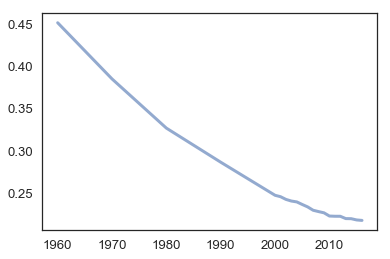

In [3]:
years = [1960, 1970, 1980, 1990, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
         2011, 2012, 2013, 2014, 2015, 2016]

land_use_pp = [0.451919372, 0.385204614, 0.326785524, 0.286297473, 0.247009002, 0.24534424, 0.242130755,
            0.24018149, 0.239136634, 0.236090524, 0.233199837, 0.229251163, 0.22765509, 0.226193034, 
            0.222376911, 0.222110783, 0.22207999, 0.219344617, 0.219223725, 0.217747262, 0.21717029]
plot (years, land_use_pp)

In [26]:
systemLandPP = System(alpha = 1.2,
                      beta = .1,
                     t_0 = 1960,
                     r_0 = 0.451919372)

,values
alpha,1.200000
beta,0.100000
t_0,1960.000000
r_0,0.451919


In [118]:
def land_PP_change1(land_use_pp, system):

    pp_decline = land_use_pp/60 
    return land_use_pp - pp_decline

In [119]:
def land_PP_change2(land_use_pp, system):
    pp_decline = land_use_pp/100 + (land_use_pp**2)/200
    return land_use_pp - pp_decline

In [129]:
def run_simulation_PP(system, update_func):

    results = TimeSeries()
    results[system.t_0] = system.r_0
    
    for t in linrange(1960, 2016, 1):
        if t < 1980:
            results[t+1] = land_PP_change1(results[t], system)
        else:
            results[t+1] = land_PP_change2(results[t], system)
    return results


,values
1960,0.451919
1961,0.444387
1962,0.436981
1963,0.429698
1964,0.422536
1965,0.415494
1966,0.408569
1967,0.401760
1968,0.395064
1969,0.388479


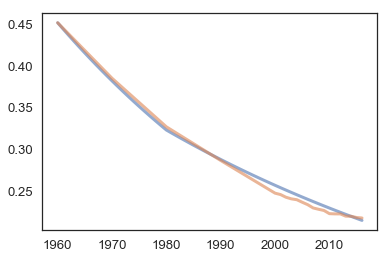

In [131]:
results = run_simulation(systemLandPP, land_PP_change)
plot (results_PP)
plot (years, land_use_pp)

In [91]:
""""Using population model from chapter 8 notebook"""

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

In [92]:
un = table2.un / 1e9
census = table2.census / 1e9

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
1955    2.782099
1956    2.835300
1957    2.891350
1958    2.948137
1959    3.000717
1960    3.043002
1961    3.083967
1962    3.140093
1963    3.209828
1964    3.281201
1965    3.350426
1966    3.420678
1967    3.490334
1968    3.562314
1969    3.637159
1970    3.712698
1971    3.790327
1972    3.866569
1973    3.942096
1974    4.016609
1975    4.089083
1976    4.160185
1977    4.232085
1978    4.304106
1979    4.379014
          ...   
1987    5.027200
1988    5.114557
1989    5.201440
1990    5.288956
1991    5.371586
1992    5.456136
1993    5.538268
1994    5.618682
1995    5.699203
1996    5.779441
1997    5.857973
1998    5.935213
1999    6.012075
2000    6.088571
2001    6.165219
2002    6.242016
2003    6.318591
2004    6.395700
2005    6.473045
2006    6.551264
2007    6.629914
2008    6.709050
2009    6.788214
2010    6.858585
2011    6.935999
2012    7.013871
2013    7.092128
2014    7

In [138]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    
    for t in linrange(system.t_0, system.t_end):
            results[t+1] = update_func(results[t], t, system)
        
    return results

In [139]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [193]:
"""usable land decline"""


total_land = 10.960000000
land_decay = 0.010000000

state = State(total_land = total_land,
             land_decay = land_decay)

t_array = linrange(1960, 2016, 1)

def decay_sim ():
    al= TimeSeries()
    
    for t in t_array:
        al[t]=total_land-land_decay*(t-1960)
    plot(al)
    


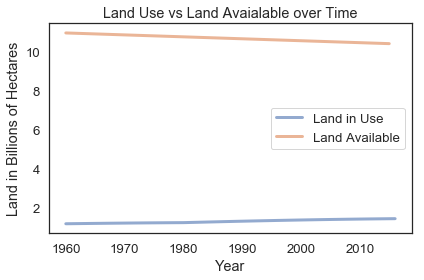

In [200]:
t_0 = 1960
t_end = get_last_label(census)
p_0 = get_first_value(census)

newTS = TimeSeries()
for i in list(results.keys()):
    newTS[i] = results[i] * results_PP[i]
    
plot(newTS, label='Land in Use')
decay_sim()


decorate(xlabel='Year', 
        ylabel='Land in Billions of Hectares',
        title='Land Use vs Land Avaialable over Time')

In [141]:
system_pop = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018)

,values
t_0,1960.000000
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800


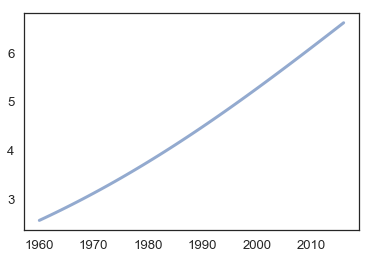

In [142]:
results = run_simulation(system_pop, update_func_quad)
plot(results)

In [147]:
def total_land_used():
    land_used = results * results_PP
plot(years, land_used)
    
    

NameError: name 'land_used' is not defined

In [163]:
system_combined = System( t_end=t_end,
                p_0=p_0,
                alpha=0.025,
                beta=-0.0018,
                t_0=1960,
                r_0=0.451919372)

,values
t_end,2016.000000
p_0,2.557629
alpha,0.025000
beta,-0.001800
t_0,1960.000000
r_0,0.451919


In [170]:
"""NOT USING THIS RIGHT NOW"""
"""combining the population and land use per person simulations"""
def run_simulation_land_change(system):

    results = TimeSeries()
    results[system.t_0] = system.r_0
    
    for t in linrange(1960, 2016, 1):
        if t < 1980:
            results[t+1] = land_change1(results[t], system)
        else:
            results[t+1] = land_change2(results[t], system)
    return results

In [171]:
def land_change1(pop, t, land_use_pp, system):
    
    net_growth = system.alpha * pop + system.beta * pop**2
    pp_decline = land_use_pp/60 
    return (land_use_pp - pp_decline) * (pop + net_growth)

In [172]:
def land_change2(pop, t, land_use_pp, system):
    net_growth = system.alpha * pop + system.beta * pop**2
    pp_decline = land_use_pp/100 + (land_use_pp**2)/200
    return (land_use_pp - pp_decline) * (pop + net_growth)

In [173]:
results = run_simulation_land_change(system_combined)
plot(results)

TypeError: land_change1() missing 2 required positional arguments: 'land_use_pp' and 'system'

In [49]:

total_land = 10960000000
land_decay = 10000000

state = State(total_land = total_land,
             land_decay = land_decay)


,values
total_land,10960000000
land_decay,10000000


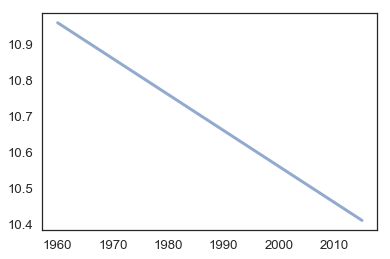

In [199]:
"""usable land decline"""
t_array = linrange(1960, 2016, 1)

def decay_sim ():
    al= TimeSeries()
    
    for t in t_array:
        al[t]=total_land-land_decay*(t-1960)
    plot(al, label='Land Available')
    
decay_sim()